# Heritage Housing Issue

## Objective
To develop a data web application that accurately predicts house sales prices in Ames, Iowa, with a specific focus on valuing Lydia Doe's four inherited properties. The application will leverage historical housing data to identify key value drivers in the local market and provide reliable price estimates to maximize potential sales revenue.

## Outcomes
1. **Market Analysis**
    - Identify and visualize the key attributes that significantly influence house prices in Ames, Iowa
2. **Predictive Model**
    - Develop a robust machine learning model trained on historical Ames housing data
    - Create a user-friendly web interface that allows Lydia to input property attributes and receive price predictions
3. **Decision Support Tool**
    - Offer a reusable tool for evaluating future property investments in the Ames area

This solution will empower Lydia to make informed decisions about her inherited properties while giving her a lasting tool to evaluate future property opportunities in the Ames, Iowa market.


In [1]:
import pandas as pd
import copy
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle


In [2]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Data

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
copy_df = pd.read_csv('data/house_prices_records.csv')
df = copy_df.copy()

In [5]:
df.columns

Index(['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtExposure', 'BsmtFinSF1',
       'BsmtFinType1', 'BsmtUnfSF', 'EnclosedPorch', 'GarageArea',
       'GarageFinish', 'GarageYrBlt', 'GrLivArea', 'KitchenQual', 'LotArea',
       'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond',
       'OverallQual', 'TotalBsmtSF', 'WoodDeckSF', 'YearBuilt', 'YearRemodAdd',
       'SalePrice'],
      dtype='object')

# EDA (Exploratory Data Analysis)

In [6]:
df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,0.0,548,RFn,2003.0,1710,Gd,8450,65.0,196.0,61,5,7,856,0.0,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,NaN,460,RFn,1976.0,1262,TA,9600,80.0,0.0,0,8,6,1262,NaN,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,0.0,608,RFn,2001.0,1786,Gd,11250,68.0,162.0,42,5,7,920,NaN,2001,2002,223500
3,961,NaN,NaN,No,216,ALQ,540,NaN,642,Unf,1998.0,1717,Gd,9550,60.0,0.0,35,5,7,756,NaN,1915,1970,140000
4,1145,NaN,4.0,Av,655,GLQ,490,0.0,836,RFn,2000.0,2198,Gd,14260,84.0,350.0,84,5,8,1145,NaN,2000,2000,250000


In [7]:
df.shape

(1460, 24)

<b> The dataset has 1460 samples with 24 features. </b>

In [8]:
df.dtypes

1stFlrSF           int64
2ndFlrSF         float64
BedroomAbvGr     float64
BsmtExposure      object
BsmtFinSF1         int64
BsmtFinType1      object
BsmtUnfSF          int64
EnclosedPorch    float64
GarageArea         int64
GarageFinish      object
GarageYrBlt      float64
GrLivArea          int64
KitchenQual       object
LotArea            int64
LotFrontage      float64
MasVnrArea       float64
OpenPorchSF        int64
OverallCond        int64
OverallQual        int64
TotalBsmtSF        int64
WoodDeckSF       float64
YearBuilt          int64
YearRemodAdd       int64
SalePrice          int64
dtype: object

<b> We are checking the data type of our features in the data. We have a combination of mixed data types in the dataset. </b>

In [9]:
# Display basic information about the dataset
print("Dataset Info:")
print(df.info())

# Display summary statistics
print("\nSummary Statistics:")
df.describe()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   1stFlrSF       1460 non-null   int64  
 1   2ndFlrSF       1374 non-null   float64
 2   BedroomAbvGr   1361 non-null   float64
 3   BsmtExposure   1422 non-null   object 
 4   BsmtFinSF1     1460 non-null   int64  
 5   BsmtFinType1   1315 non-null   object 
 6   BsmtUnfSF      1460 non-null   int64  
 7   EnclosedPorch  136 non-null    float64
 8   GarageArea     1460 non-null   int64  
 9   GarageFinish   1225 non-null   object 
 10  GarageYrBlt    1379 non-null   float64
 11  GrLivArea      1460 non-null   int64  
 12  KitchenQual    1460 non-null   object 
 13  LotArea        1460 non-null   int64  
 14  LotFrontage    1201 non-null   float64
 15  MasVnrArea     1452 non-null   float64
 16  OpenPorchSF    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtFinSF1,BsmtUnfSF,EnclosedPorch,GarageArea,GarageYrBlt,GrLivArea,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,SalePrice
count,1460.000000,1374.000000,1361.000000,1460.000000,1460.000000,136.000000,1460.000000,1379.000000,1460.000000,1460.000000,1201.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,155.000000,1460.000000,1460.000000,1460.000000
mean,1162.626712,348.524017,2.869214,443.639726,567.240411,25.330882,472.980137,1978.506164,1515.463699,10516.828082,70.049958,103.685262,46.660274,5.575342,6.099315,1057.429452,103.741935,1971.267808,1984.865753,180921.195890
std,386.587738,438.865586,0.820115,456.098091,441.866955,66.684115,213.804841,24.689725,525.480383,9981.264932,24.284752,181.066207,66.256028,1.112799,1.382997,438.705324,135.543152,30.202904,20.645407,79442.502883
min,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1900.000000,334.000000,1300.000000,21.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1872.000000,1950.000000,34900.000000
25%,882.000000,0.000000,2.000000,0.000000,223.000000,0.000000,334.500000,1961.000000,1129.500000,7553.500000,59.000000,0.000000,0.000000,5.000000,5.000000,795.750000,0.000000,1954.000000,1967.000000,129975.000000
50%,1087.000000,0.000000,3.000000,383.500000,477.500000,0.000000,480.000000,1980.000000,1464.000000,9478.500000,69.000000,0.000000,25.000000,5.000000,6.000000,991.500000,0.000000,1973.000000,1994.000000,163000.000000
75%,1391.250000,728.000000,3.000000,712.250000,808.000000,0.000000,576.000000,2002.000000,1776.750000,11601.500000,80.000000,166.000000,68.000000,6.000000,7.000000,1298.250000,182.500000,2000.000000,2004.000000,214000.000000
max,4692.000000,2065.000000,8.000000,5644.000000,2336.000000,286.000000,1418.000000,2010.000000,5642.000000,215245.000000,313.000000,1600.000000,547.000000,9.000000,10.000000,6110.000000,736.000000,2010.000000,2010.000000,755000.000000


In [10]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
# Display columns with missing values
print("Columns with missing values:")
print(missing_percentage[missing_percentage > 0])

Columns with missing values:
2ndFlrSF          5.890411
BedroomAbvGr      6.780822
BsmtExposure      2.602740
BsmtFinType1      9.931507
EnclosedPorch    90.684932
GarageFinish     16.095890
GarageYrBlt       5.547945
LotFrontage      17.739726
MasVnrArea        0.547945
WoodDeckSF       89.383562
dtype: float64


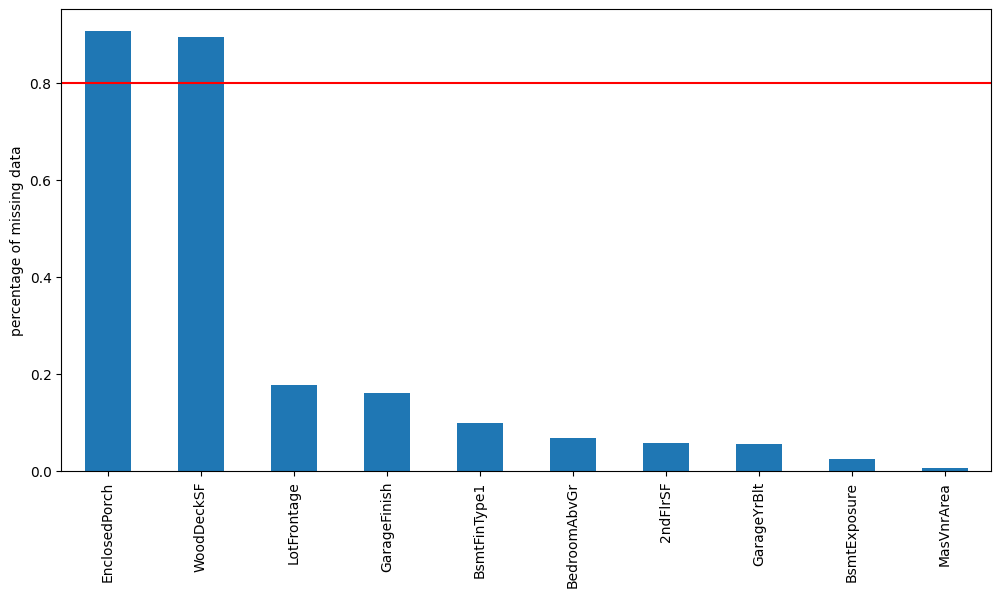

In [11]:
lis=[i for i in df.columns if df[i].isnull().sum()>0]
df[lis].isnull().mean().sort_values(ascending=False).plot.bar(figsize=(12,6))
plt.ylabel('percentage of missing data')
plt.axhline(y=0.8,c='r')
plt.show()

<b> We are checking the missing value in our dataset. As we can see, there are some features that has missing values in them. In order to have a good model to predict results, it is important to impute missing values. We have set the threshold of mssing values to 80%. Any features having more than 80% missing values will be removed from our analysis and model training.</b>

In [12]:
del df['EnclosedPorch']
del df['WoodDeckSF']

<b> EnclosedPorch and WoodDeckSF feature has more than 80% missing values. Hence we are dropping these two features. </b>

In [13]:
missing_values = df.isnull().sum()
print(missing_values)

1stFlrSF          0
2ndFlrSF         86
BedroomAbvGr     99
BsmtExposure     38
BsmtFinSF1        0
BsmtFinType1    145
BsmtUnfSF         0
GarageArea        0
GarageFinish    235
GarageYrBlt      81
GrLivArea         0
KitchenQual       0
LotArea           0
LotFrontage     259
MasVnrArea        8
OpenPorchSF       0
OverallCond       0
OverallQual       0
TotalBsmtSF       0
YearBuilt         0
YearRemodAdd      0
SalePrice         0
dtype: int64


In [14]:
year_cols=[i for i in df.columns if 'Yr' in i or 'Year' in i]
year_cols

['GarageYrBlt', 'YearBuilt', 'YearRemodAdd']

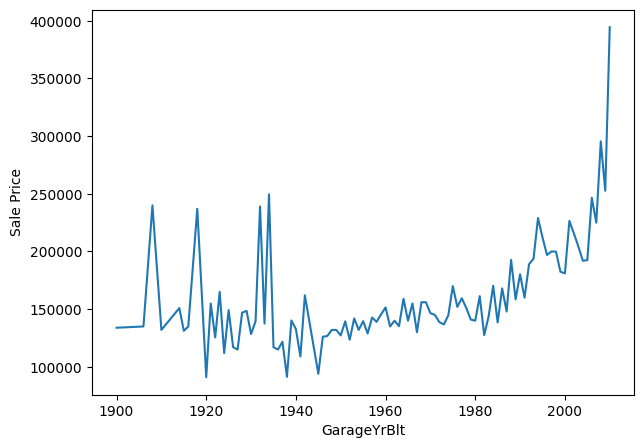

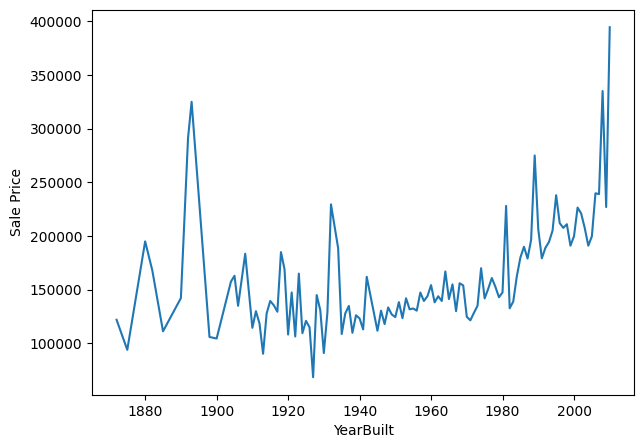

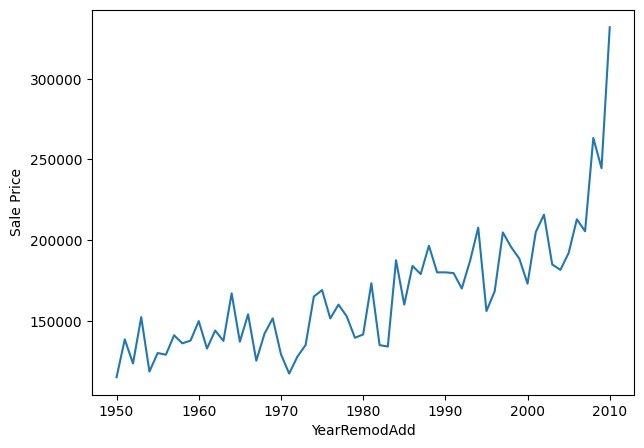

In [15]:
for i in year_cols:
    plt.figure(figsize=(7,5))
    plt.plot(df.groupby(i)['SalePrice'].median())
    plt.ylabel('Sale Price')
    plt.xlabel(i)

<b> In the above charts we are seeing a house Sale price trend over the periods. In all the three features, the house price is in increasing trend over the years of Garage Built, the year of house built and the year the house is remodelled. </b>

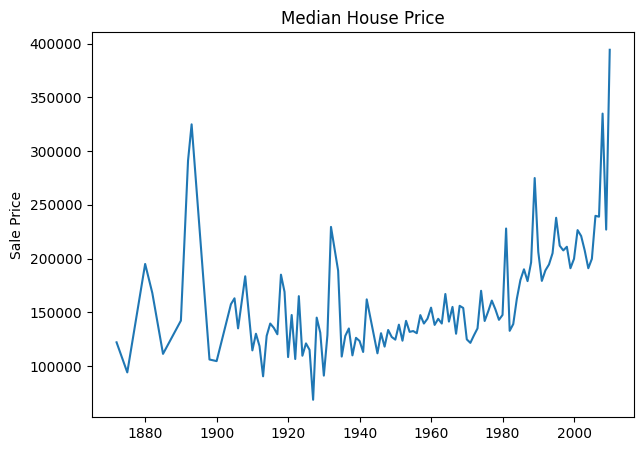

In [16]:
plt.figure(figsize=(7,5))
plt.plot(df.groupby('YearBuilt')['SalePrice'].median())
plt.ylabel('Sale Price')
plt.title('Median House Price')
plt.show()


<b> In the above we are seeing the median house Sale price trend over the periods. We can see an increasing trends for the overall period with little fluctuations between 1940 to 1980. There is a suddden increase in average house prices between 1980 as the bank rates of interests sky rocketed during that time hence affecting the mortgage rates for the borrowers. </b>

<Axes: >

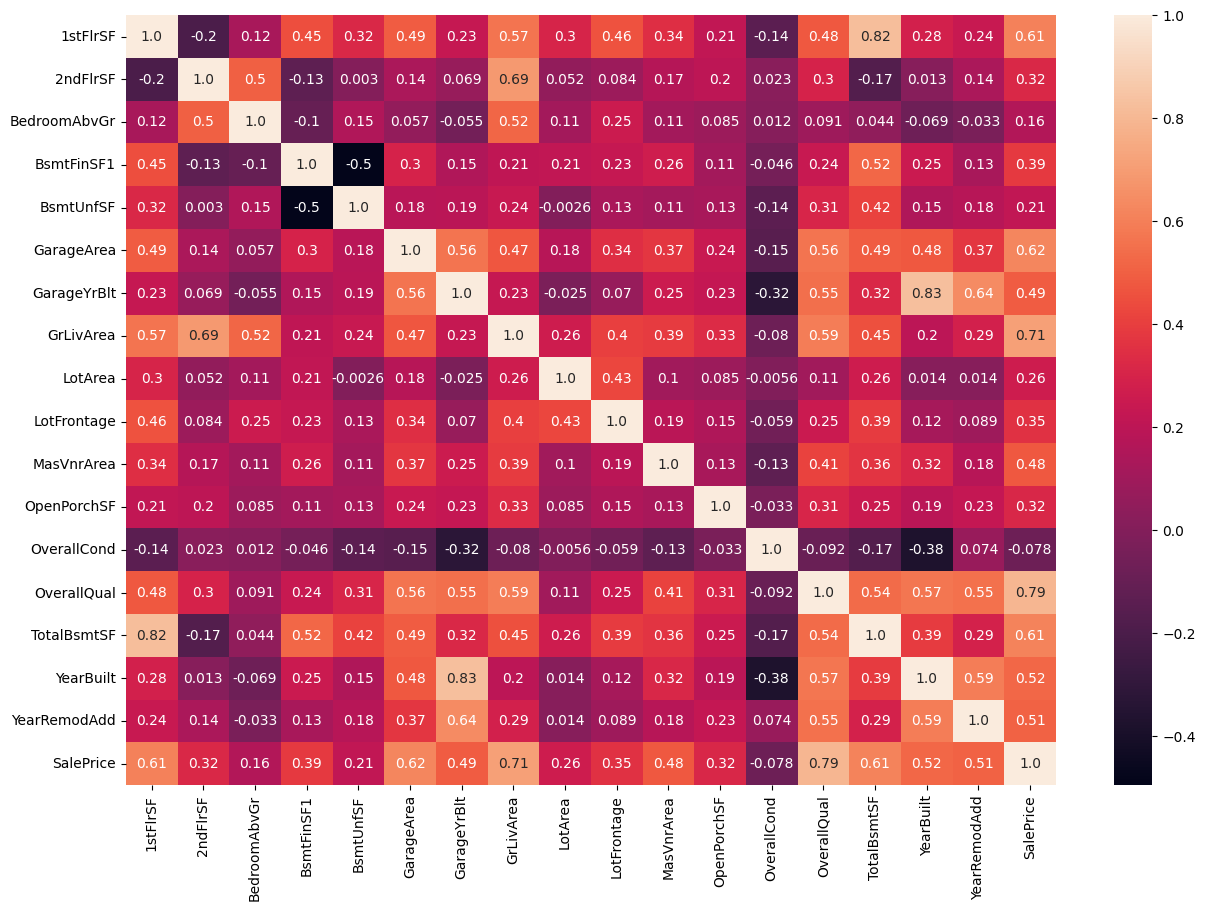

In [17]:
numeric_data = df.select_dtypes(include=[np.number])
corr = numeric_data.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, fmt=".2")

In [18]:
print (corr['SalePrice'].sort_values(ascending=False)[:10]) #top 10 correlations

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
YearBuilt       0.522897
YearRemodAdd    0.507101
GarageYrBlt     0.486362
MasVnrArea      0.477493
Name: SalePrice, dtype: float64


- <b>Here we see that the OverallQual feature is nearly 80% correlated with the target variable. Overallqual feature refers to the overall material and quality of the materials of the completed house. Well, this make sense as well. People usually consider these parameters for their dream house.

- **In addition, GrLivArea is nearly 70% correlated with the target variable. GrLivArea refers to the living area (in sq ft.) above ground. The following variables show people also care about if the house has a garage, the area of that garage, the size of the basement area, etc.** </b>

In [19]:
y = df['SalePrice']

In [20]:
num_cols = [col for col in df.columns if df[col].dtype in ['float64','int64']]
cat_cols = [col for col in df.columns if df[col].dtype not in ['float64','int64']]

print("Numerical Columns are:", num_cols)
print("Categorical Columns are:", cat_cols)

Numerical Columns are: ['1stFlrSF', '2ndFlrSF', 'BedroomAbvGr', 'BsmtFinSF1', 'BsmtUnfSF', 'GarageArea', 'GarageYrBlt', 'GrLivArea', 'LotArea', 'LotFrontage', 'MasVnrArea', 'OpenPorchSF', 'OverallCond', 'OverallQual', 'TotalBsmtSF', 'YearBuilt', 'YearRemodAdd', 'SalePrice']
Categorical Columns are: ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']


In [21]:
# Summary of categorical features
print("\nCategorical Feature Value Counts:")
for feature in cat_cols:
    print(f"\n{feature} Value Counts:")
    print(df[feature].value_counts())


Categorical Feature Value Counts:

BsmtExposure Value Counts:
BsmtExposure
No    953
Av    221
Gd    134
Mn    114
Name: count, dtype: int64

BsmtFinType1 Value Counts:
BsmtFinType1
Unf    396
GLQ    385
ALQ    202
BLQ    136
Rec    126
LwQ     70
Name: count, dtype: int64

GarageFinish Value Counts:
GarageFinish
Unf    546
RFn    366
Fin    313
Name: count, dtype: int64

KitchenQual Value Counts:
KitchenQual
TA    735
Gd    586
Ex    100
Fa     39
Name: count, dtype: int64


<b> Separating our numerical and categorical features for analysis and further feature engineering. </b>

In [22]:
# Impute missing values for numeric features with the median
for feature in ['2ndFlrSF', 'BedroomAbvGr', 'LotFrontage', 'MasVnrArea']:
    df[feature].fillna(df[feature].median(), inplace=True)

# Impute missing values for GarageYrBlt
df['GarageYrBlt'].fillna(0, inplace=True)  # Use 0 if no garage

# Impute missing values for categorical features
df['BsmtExposure'].fillna('None', inplace=True)  # No basement
df['BsmtFinType1'].fillna('None', inplace=True)  # No basement
df['GarageFinish'].fillna('None', inplace=True)  # No garage
df['KitchenQual'].fillna(df['KitchenQual'].mode()[0], inplace=True)  # Use mode for kitchen quality

<b> Imputing the missing value in the numerical columns above. </b>

### Analysing the target variable

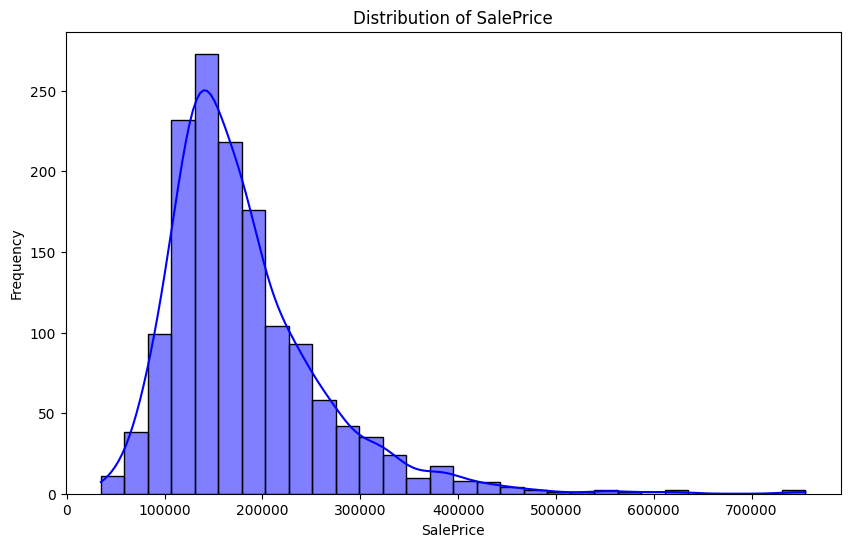


Skewness of SalePrice: 1.88


In [23]:
# Visualize the distribution of the target variable (SalePrice)
plt.figure(figsize=(10, 6))
sns.histplot(df['SalePrice'], kde=True, bins=30, color='blue')
plt.title('Distribution of SalePrice')
plt.xlabel('SalePrice')
plt.ylabel('Frequency')
plt.show()

# Check for skewness in the target variable
from scipy.stats import skew
saleprice_skewness = skew(df['SalePrice'])
print(f"\nSkewness of SalePrice: {saleprice_skewness:.2f}")

- <b>We can see that the target is continuous, and the distribution is skewed towards the right. The skewness of the SalePrice is 1.88.
- This indicates that the distribution of house prices is positively skewed (or skewed to the right).
- The distribution has a longer tail on the right side. Most of the house prices are concentrated on the lower end of the scale, with fewer houses having very high prices.
- Outliers: The right tail suggests the presence of outliers or extreme values (houses with very high sale prices).
- Non-Normal Distribution: The target variable does not follow a normal distribution, which can affect the performance of certain machine learning models that assume normality (e.g., linear regression).

</b>

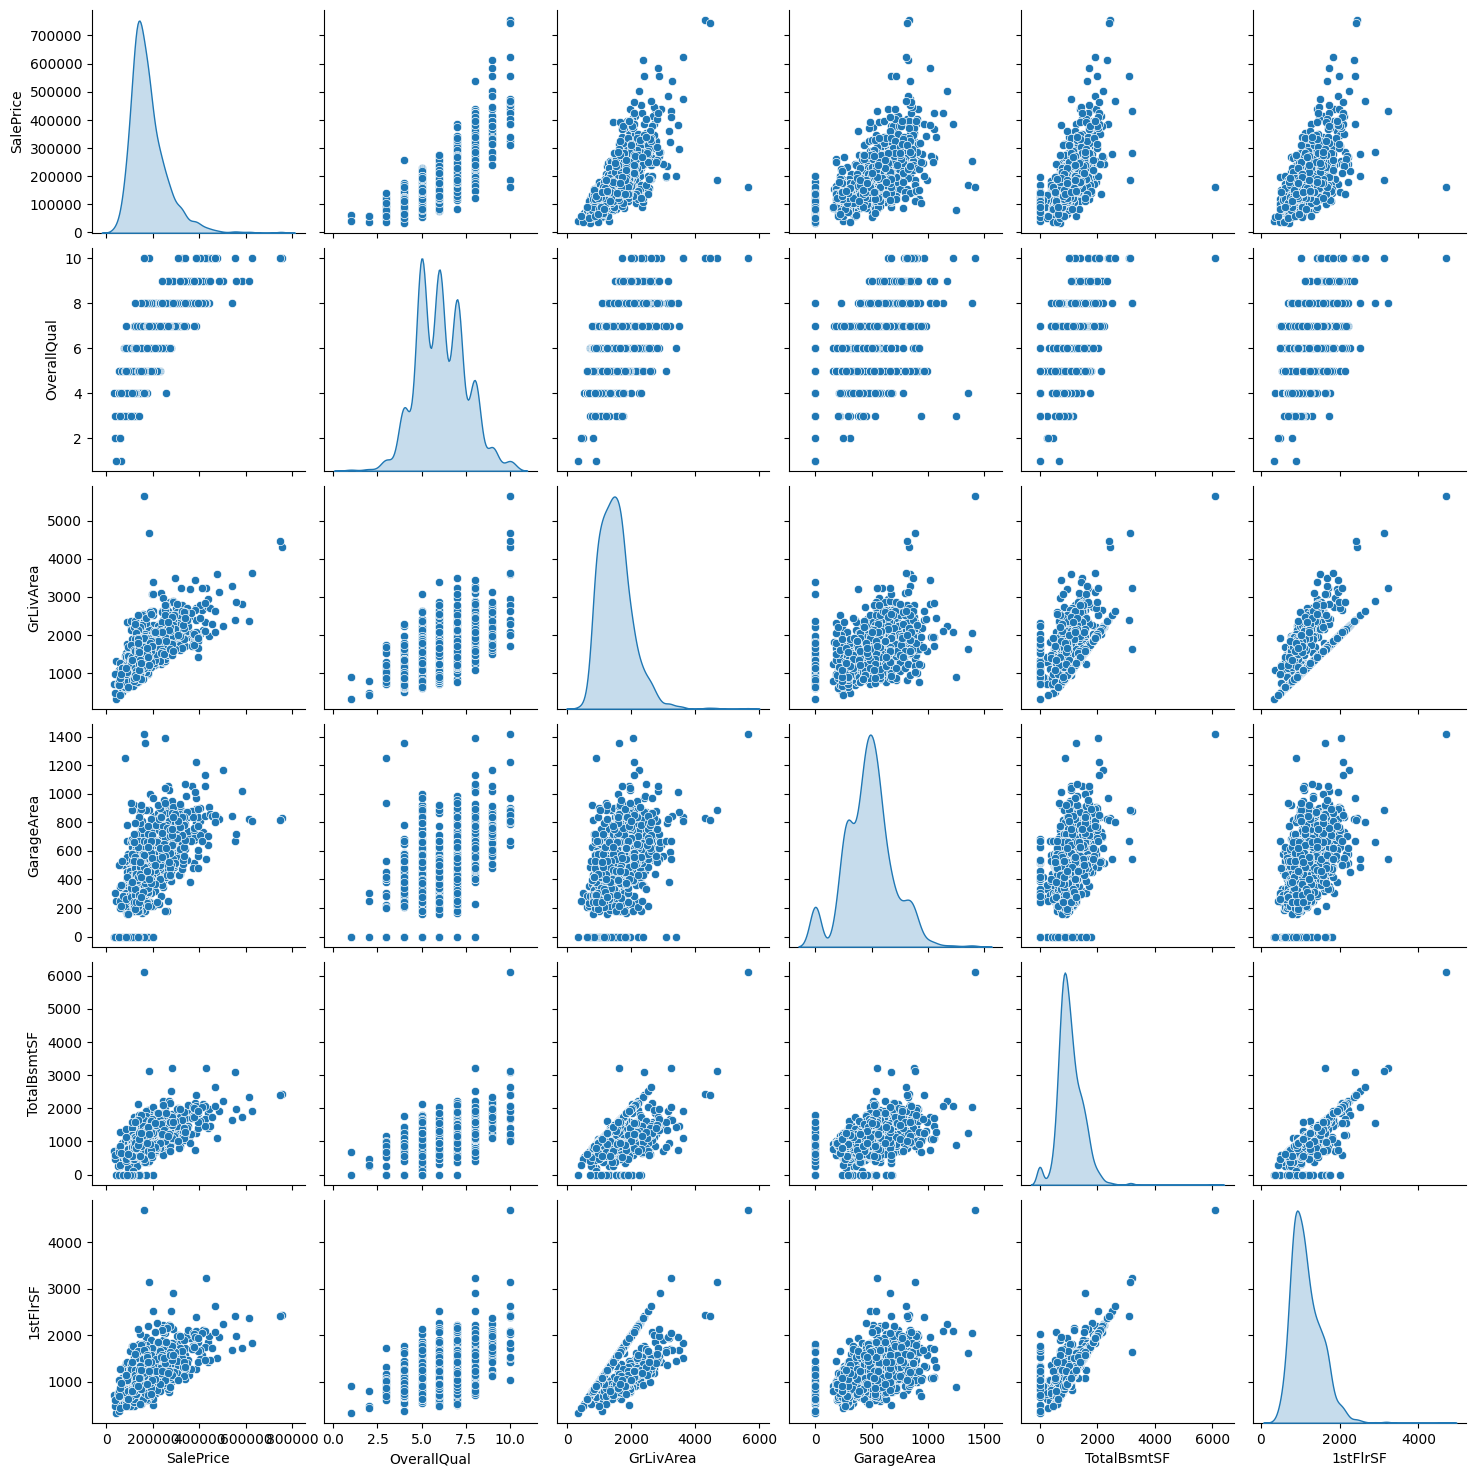

In [25]:
# Pairplot for highly correlated features
correlation_with_target = numeric_data.corr()['SalePrice'].sort_values(ascending=False)
high_corr_features = correlation_with_target.head(6).index.tolist()
sns.pairplot(df[high_corr_features], diag_kind='kde')
plt.show()

- <b> The top 5 highly correlated features with Sales price has been plotted above. These are OverallQual, GrLivArea, GarageArea, TotalBsmtSF, 1stFlrSF.
- **We can see that the features are linearly correlated with the target variable in the above scatter pair plots.** </b>

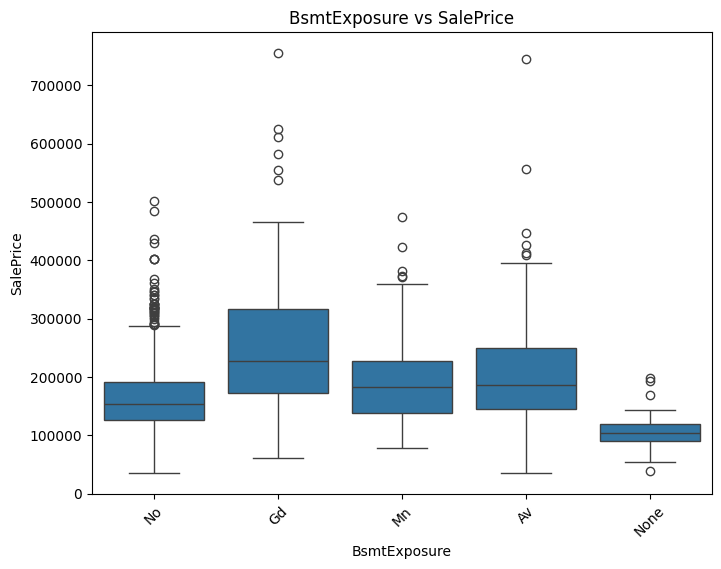

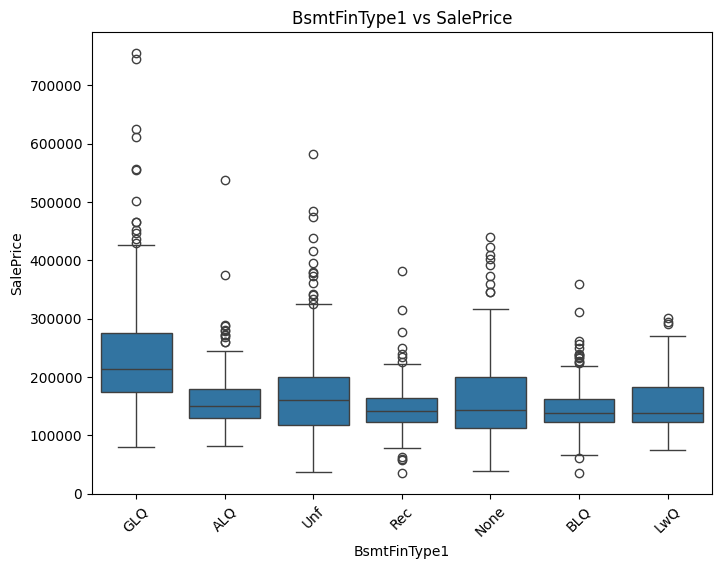

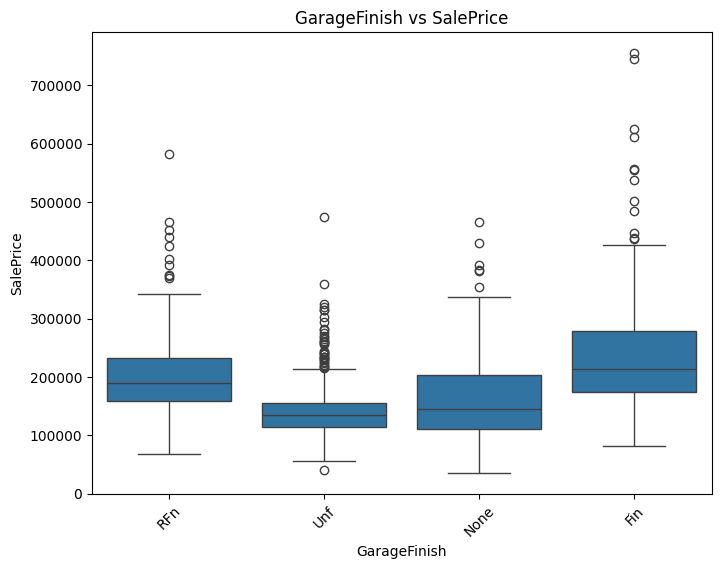

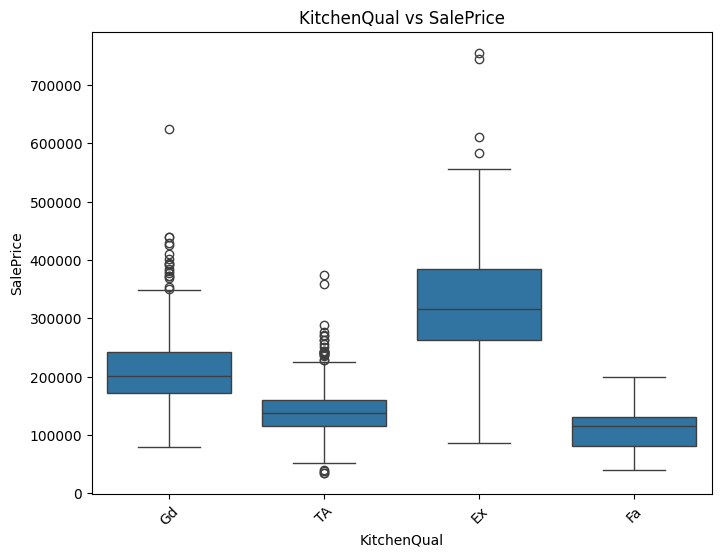

In [26]:
# Boxplots for categorical features vs SalePrice
categorical_features = ['BsmtExposure', 'BsmtFinType1', 'GarageFinish', 'KitchenQual']
for feature in categorical_features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.xticks(rotation=45)
    plt.show()

- <b> The Box plot shows us the outliers (extreme values) in the features. We have seen that in our catrgorical features, there are quite a few outliers. However, we are not removing or treating them. Insteat we will be using Robust machine learning regressors that are not sensitive to outliers and can handle them easily during the training and predictions. </b>

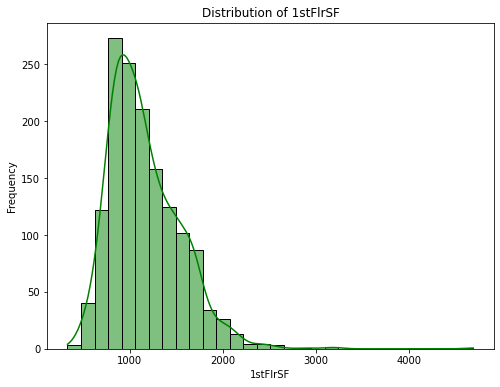

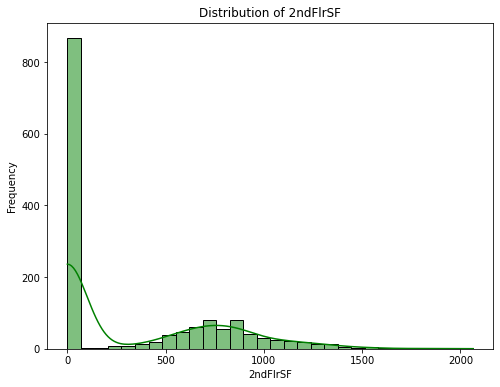

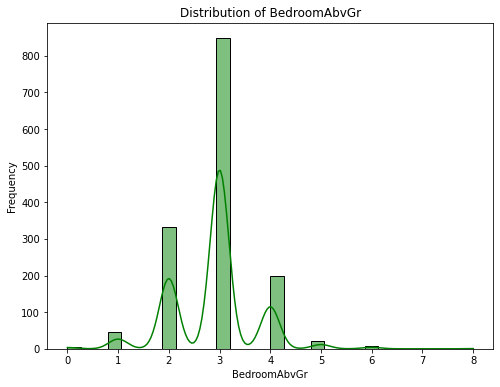

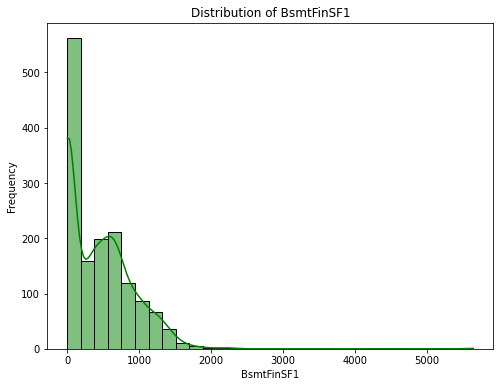

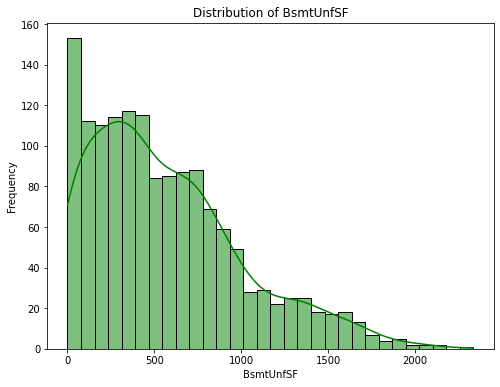

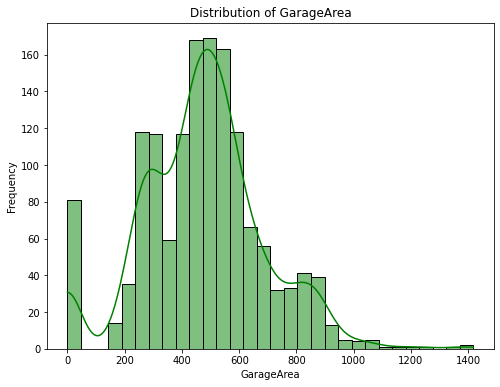

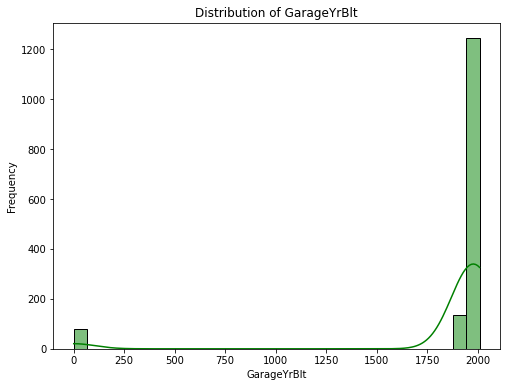

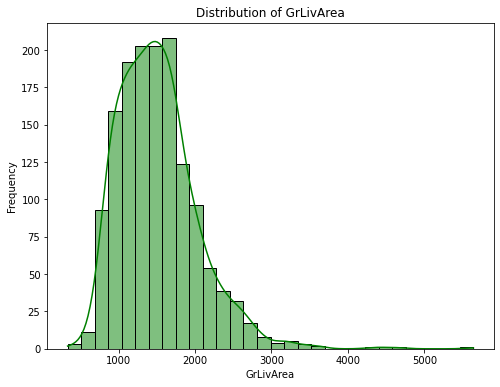

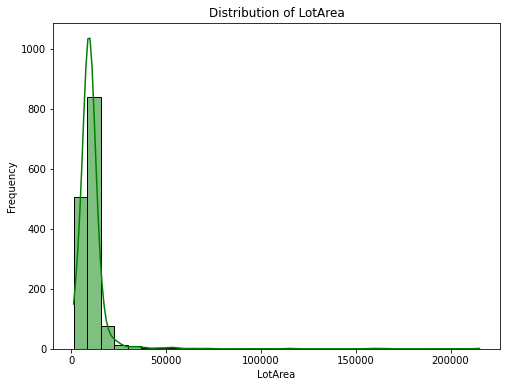

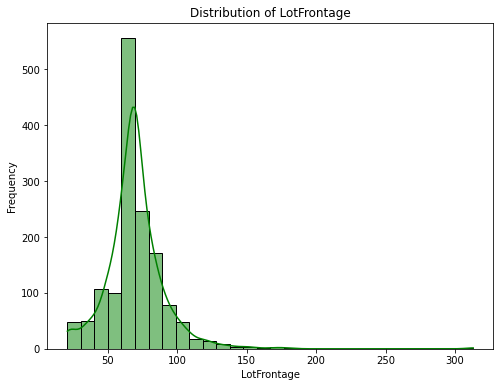

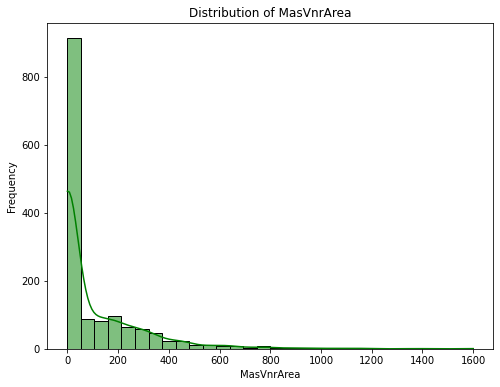

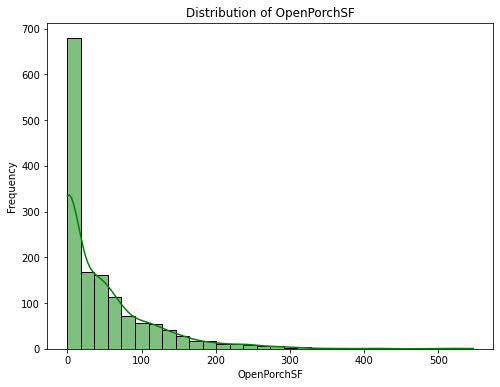

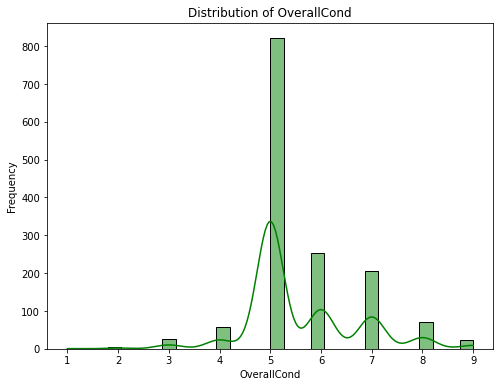

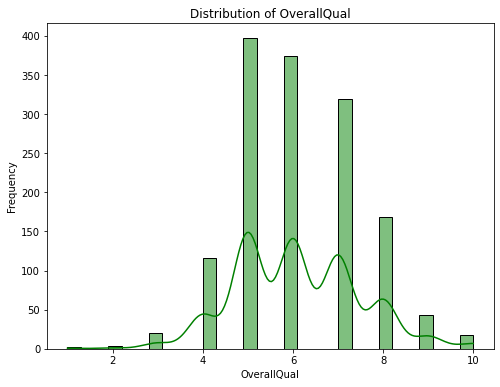

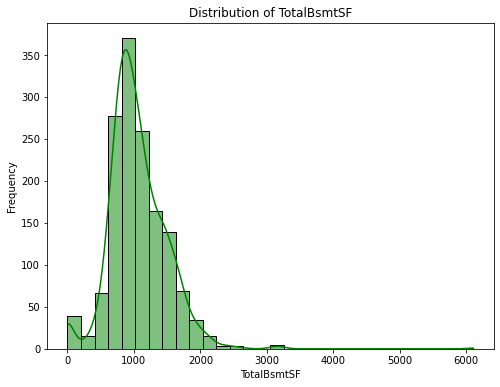

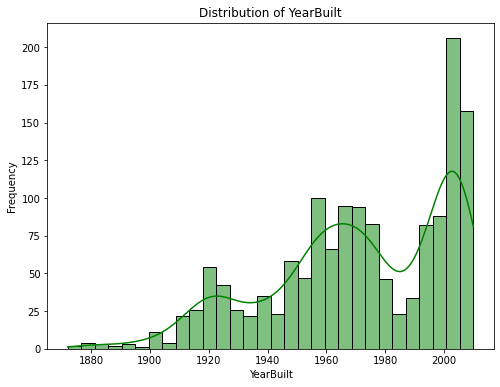

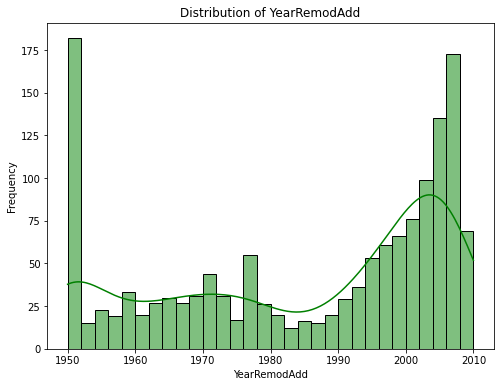

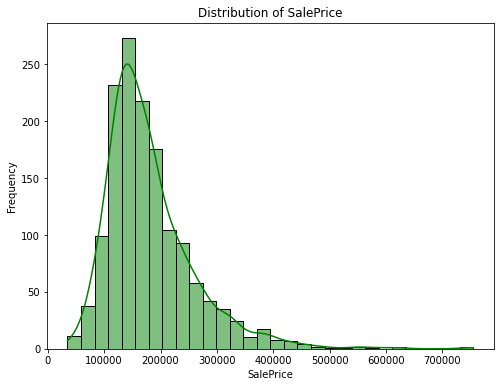

In [611]:

# Distribution of numeric features
numeric_features = ['2ndFlrSF', 'BedroomAbvGr', 'LotFrontage', 'MasVnrArea', 'GarageYrBlt']
for feature in num_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], kde=True, bins=30, color='green')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

- <b> The above charts shows the distribution spread of our numerical features. Some of the features are highly positively and negatively skewed. This can be handled in data preprocessing by doing certain transaformations on these columns. Alternatively, ensemble regressors doesn't need to normalise and transform the data. Hence, we will use them in our model training. </b>

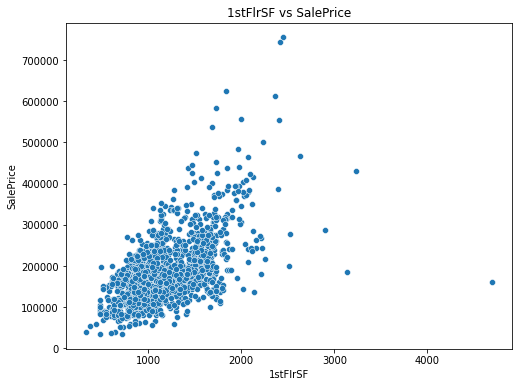

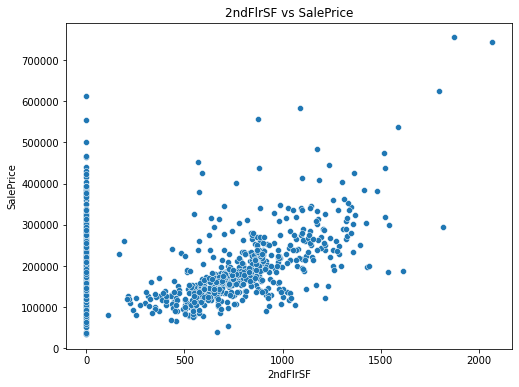

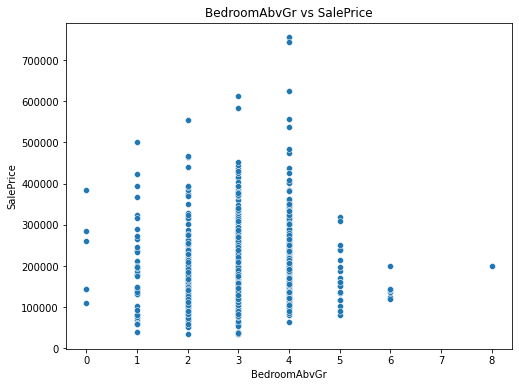

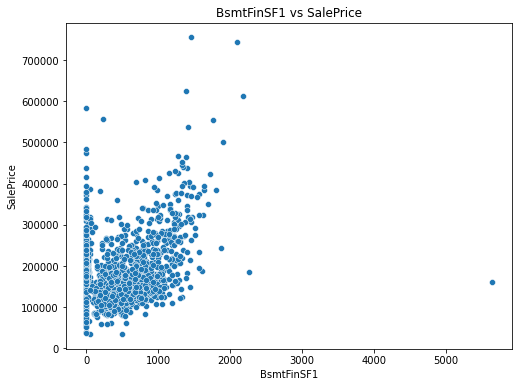

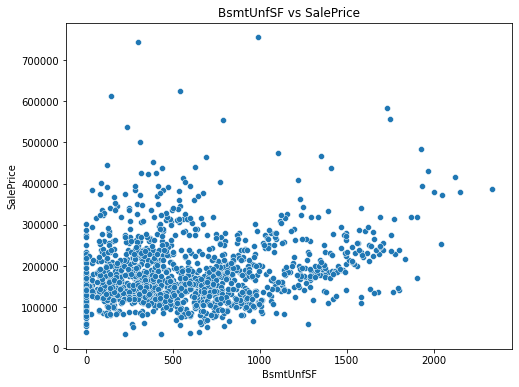

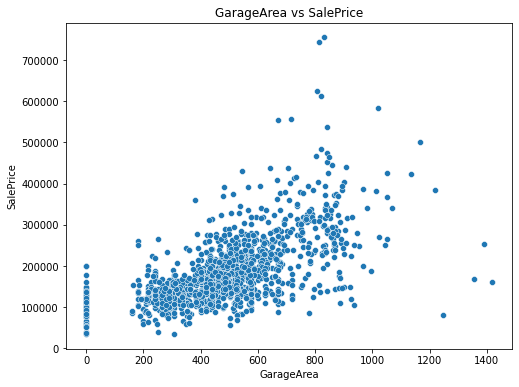

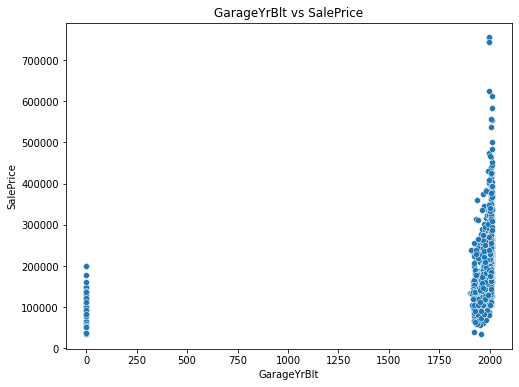

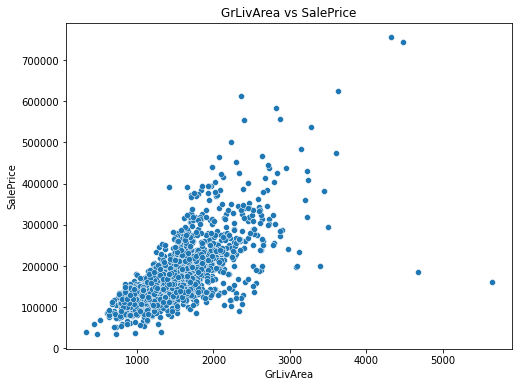

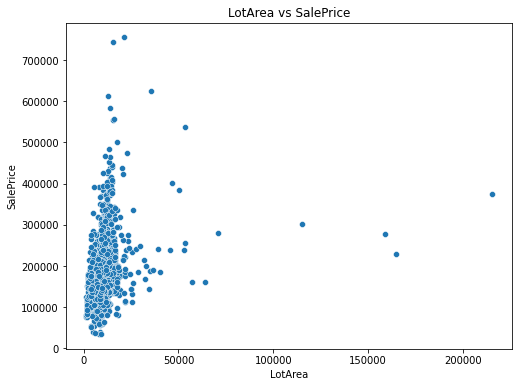

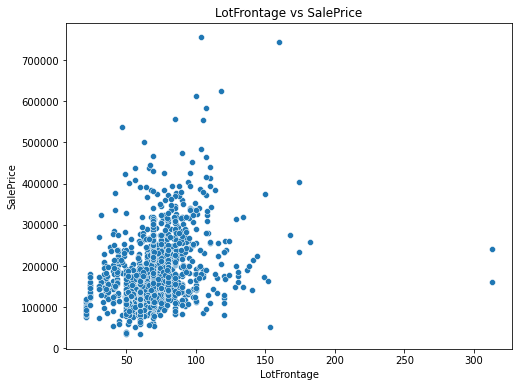

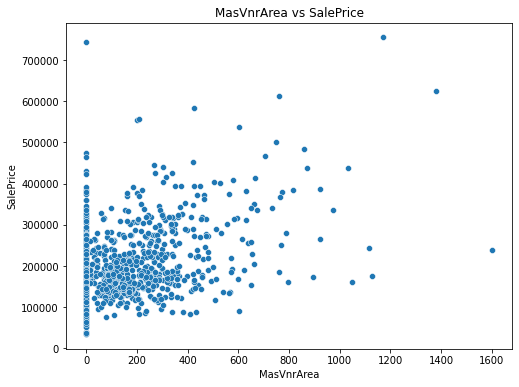

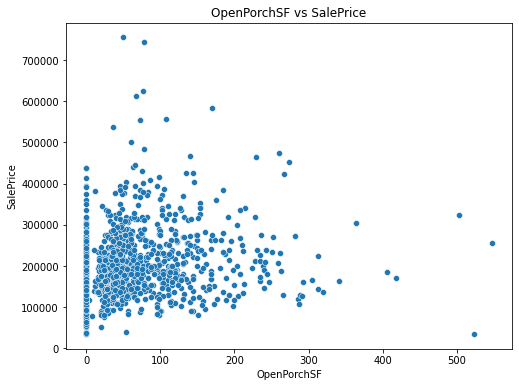

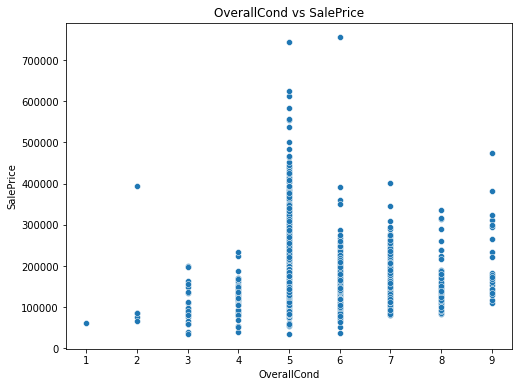

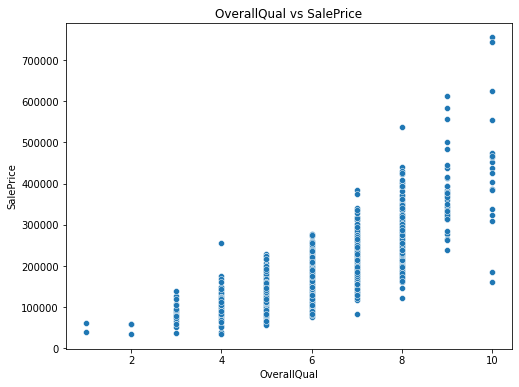

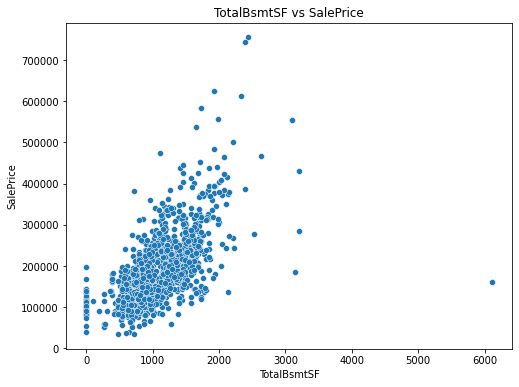

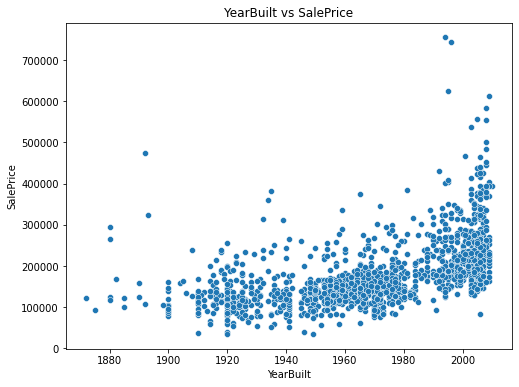

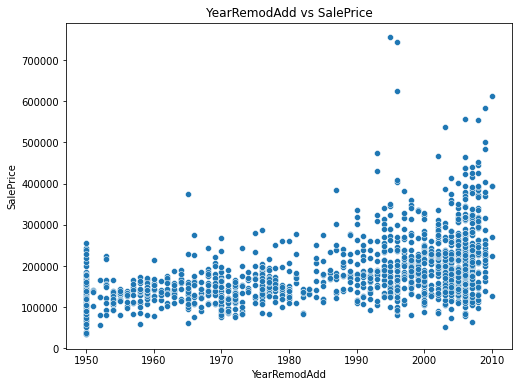

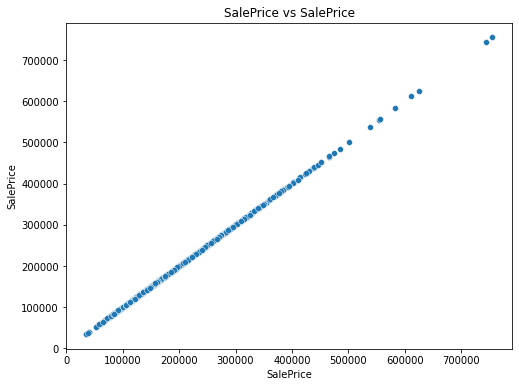

In [612]:
# Scatterplots for numeric features vs SalePrice
for feature in num_cols:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=df[feature], y=df['SalePrice'])
    plt.title(f'{feature} vs SalePrice')
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.show()

- <b> Scatter plots above shows us the relationship of our features with the target variable SalePrice. Some of the features that are linearly correlated to Saleprice could be seen showing us linear trend of data. While the ones that doesn't have strong correlation doesn't show any pattern/trend and the data points are randomly scattered around the axis. </b>

# Feature Engineering and Model Building

In [613]:
model_df = copy.deepcopy(df)

In [614]:
model_df

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,SalePrice
0,856,854.0,3.0,No,706,GLQ,150,548,RFn,2003.0,1710,Gd,8450,65.0,196.0,61,5,7,856,2003,2003,208500
1,1262,0.0,3.0,Gd,978,ALQ,284,460,RFn,1976.0,1262,TA,9600,80.0,0.0,0,8,6,1262,1976,1976,181500
2,920,866.0,3.0,Mn,486,GLQ,434,608,RFn,2001.0,1786,Gd,11250,68.0,162.0,42,5,7,920,2001,2002,223500
3,961,0.0,3.0,No,216,ALQ,540,642,Unf,1998.0,1717,Gd,9550,60.0,0.0,35,5,7,756,1915,1970,140000
4,1145,0.0,4.0,Av,655,GLQ,490,836,RFn,2000.0,2198,Gd,14260,84.0,350.0,84,5,8,1145,2000,2000,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,953,694.0,3.0,No,0,Unf,953,460,RFn,1999.0,1647,TA,7917,62.0,0.0,40,5,6,953,1999,2000,175000
1456,2073,0.0,3.0,No,790,ALQ,589,500,Unf,1978.0,2073,TA,13175,85.0,119.0,0,6,6,1542,1978,1988,210000
1457,1188,1152.0,4.0,No,275,GLQ,877,252,RFn,1941.0,2340,Gd,9042,66.0,0.0,60,9,7,1152,1941,2006,266500
1458,1078,0.0,2.0,Mn,49,None,0,240,Unf,1950.0,1078,Gd,9717,68.0,0.0,0,6,5,1078,1950,1996,142125


In [615]:
# Ordinal Encoding for BsmtExposure
bsmt_exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
model_df['BsmtExposure'] = model_df['BsmtExposure'].map(bsmt_exposure_mapping)

# Ordinal Encoding for BsmtFinType1
bsmt_fin_type1_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
model_df['BsmtFinType1'] = model_df['BsmtFinType1'].map(bsmt_fin_type1_mapping)

# One-Hot Encoding for GarageFinish with 1 and 0
garage_finish_dummies = pd.get_dummies(model_df['GarageFinish'], prefix='GarageFinish', drop_first=True)
model_df = pd.concat([model_df, garage_finish_dummies], axis=1)
model_df.drop('GarageFinish', axis=1, inplace=True)

# Ordinal Encoding for KitchenQual
kitchen_qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}
model_df['KitchenQual'] = model_df['KitchenQual'].map(kitchen_qual_mapping)

# Verify the transformations
print(model_df[['BsmtExposure', 'BsmtFinType1', 'GarageFinish_RFn', 'GarageFinish_Unf', 'KitchenQual']].head())

   BsmtExposure  BsmtFinType1  GarageFinish_RFn  GarageFinish_Unf  KitchenQual
0             1             6              True             False            4
1             4             5              True             False            3
2             2             6              True             False            4
3             1             5             False              True            4
4             3             6              True             False            4


- **The models cannot accept categorical inputs, so we have to convert them to numerical data. We have chosen Ordinal encoding for BsmtExposure, BsmtFinalType1, KitchenQual and One-Hot encoding for GarageFininsh.**
- **The reason for using Ordinal Encoding is feature has an inherent order or ranking (e.g., 'Gd' > 'Av' > 'Mn' > 'No' > 'None'). Ordinal encoding preserves this order by assigning higher numerical values to categories with higher rankings.**
- **The reason for One-Hot encoding is The GarageFinish feature does not have a natural order (e.g., 'RFn', 'Unf', 'Fin'), so ordinal encoding would not be appropriate. Instead, one-hot encoding is used to create binary columns for each category (except one, to avoid multicollinearity).**

In [616]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor, ExtraTreesRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error
from sklearn.model_selection import train_test_split

X = model_df.drop('SalePrice', axis=1)
y = model_df['SalePrice']

X.to_csv('processed_data/X.csv', index=False)
y.to_csv('processed_data/y.csv', index=False)

<b> Splitting the data into training and testing sets </b>

Training Random Forest...
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


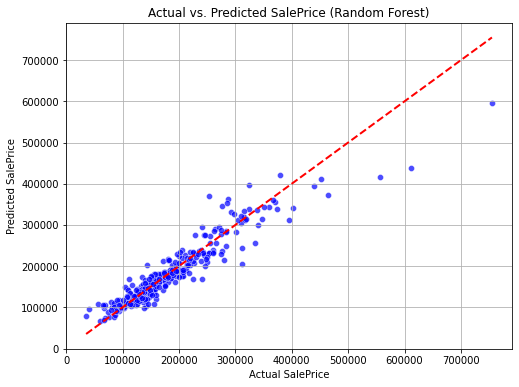

Random Forest Evaluation Results:
RMSE: 28044.14, MAE: 17548.29, MAPE: 10.43%, Median AE: 10063.50
R2: 0.89, Adjusted R2: 0.88
****************************************************************************************************


Training XGBoost...
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


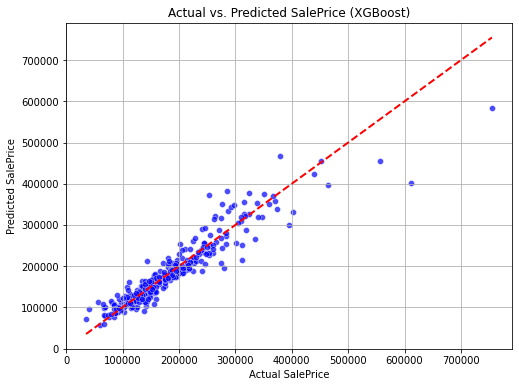

XGBoost Evaluation Results:
RMSE: 28426.55, MAE: 17106.00, MAPE: 9.98%, Median AE: 9535.91
R2: 0.88, Adjusted R2: 0.88
****************************************************************************************************


Training AdaBoost...
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


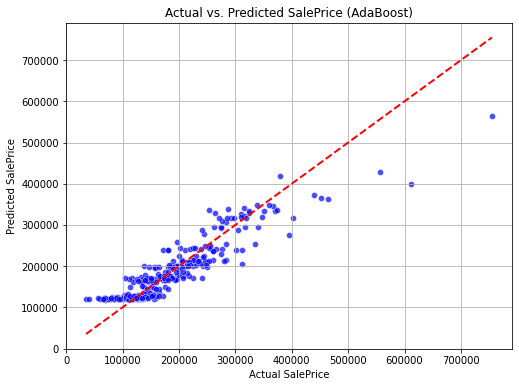

AdaBoost Evaluation Results:
RMSE: 34061.04, MAE: 23757.02, MAPE: 15.83%, Median AE: 16801.89
R2: 0.83, Adjusted R2: 0.82
****************************************************************************************************


Training Extra Trees...
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


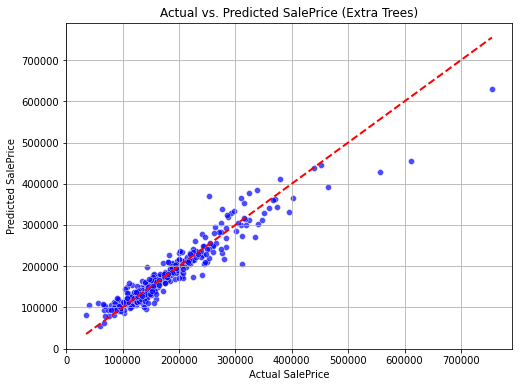

Extra Trees Evaluation Results:
RMSE: 25242.62, MAE: 16188.45, MAPE: 10.08%, Median AE: 10035.50
R2: 0.91, Adjusted R2: 0.90
****************************************************************************************************


Training Gradient Boosting...
<class 'pandas.core.series.Series'> <class 'numpy.ndarray'>


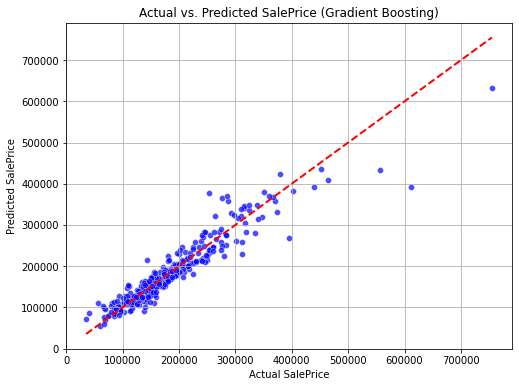

Gradient Boosting Evaluation Results:
RMSE: 27190.81, MAE: 17027.44, MAPE: 9.96%, Median AE: 11005.92
R2: 0.89, Adjusted R2: 0.89
****************************************************************************************************



Model Evaluation Results:
               Model          RMSE           MAE       MAPE     Median AE  \
0      Random Forest  28044.140794  17548.286676  10.427761  10063.500000   
1            XGBoost  28426.546466  17106.000000   9.980648   9535.906250   
2           AdaBoost  34061.039897  23757.016358  15.831555  16801.891697   
3        Extra Trees  25242.620511  16188.452000  10.081139  10035.500000   
4  Gradient Boosting  27190.810064  17027.439911   9.956005  11005.915568   

         R2  Adjusted R2  
0  0.887732     0.880159  
1  0.884649     0.876869  
2  0.834389     0.823219  
3  0.909042     0.902907  
4  0.894460     0.887341  

Best Model Based on RMSE: Extra Trees
RMSE: 25242.62, MAE: 16188.45, MAPE: 10.08%, Median AE: 10035.50
R2: 0.91, A

In [617]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Initialize models
models = {
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'AdaBoost': AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    'Extra Trees': ExtraTreesRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

# Function to calculate Adjusted R²
def adjusted_r2(r2, n, k):
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))

results = []

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
    median_ae = median_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    adj_r2 = adjusted_r2(r2, X_test.shape[0], X_test.shape[1])

    output_dict = {
        'Model': name,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE': mape,
        'Median AE': median_ae,
        'R2': r2,
        'Adjusted R2': adj_r2
    }
    
    # Store results
    results.append(output_dict)

    print(type(y_test), type(y_pred))
    # Create a scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue')
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
    plt.title(f'Actual vs. Predicted SalePrice ({name})')
    plt.xlabel('Actual SalePrice')
    plt.ylabel('Predicted SalePrice')
    plt.grid(True)
    plt.show()

    print(f"{name} Evaluation Results:")
    print(f"RMSE: {rmse:.2f}, MAE: {mae:.2f}, MAPE: {mape:.2f}%, Median AE: {median_ae:.2f}")
    print(f"R2: {r2:.2f}, Adjusted R2: {adj_r2:.2f}")
    print("*"*100)
    print("\n")


results_df = pd.DataFrame(results)

print("\nModel Evaluation Results:")
print(results_df)

# Find the best model based on RMSE
best_model = results_df.loc[results_df['RMSE'].idxmin()]
print(f"\nBest Model Based on RMSE: {best_model['Model']}")
print(f"RMSE: {best_model['RMSE']:.2f}, MAE: {best_model['MAE']:.2f}, MAPE: {best_model['MAPE']:.2f}%, Median AE: {best_model['Median AE']:.2f}")
print(f"R2: {best_model['R2']:.2f}, Adjusted R2: {best_model['Adjusted R2']:.2f}")

In [618]:
results_df.sort_values(['RMSE', 'Adjusted R2', 'R2'], ascending=True, inplace=True)
results_df

,Model,RMSE,MAE,MAPE,Median AE,R2,Adjusted R2
3,Extra Trees,25242.620511,16188.452000,10.081139,10035.500000,0.909042,0.902907
4,Gradient Boosting,27190.810064,17027.439911,9.956005,11005.915568,0.894460,0.887341
0,Random Forest,28044.140794,17548.286676,10.427761,10063.500000,0.887732,0.880159
1,XGBoost,28426.546466,17106.000000,9.980648,9535.906250,0.884649,0.876869
2,AdaBoost,34061.039897,23757.016358,15.831555,16801.891697,0.834389,0.823219


In [619]:
# results_df.sort_values(['RMSE', 'Adjusted R2', 'R2'], ascending=True, inplace=True)
results_df.to_csv('model_evaluation_results/model_results.csv', index=False)

##### 1. Splitting the Data
- The dataset is split into training and testing sets using `train_test_split`, with 75% of the data used for training and 25% for testing. A `random_state` is set for reproducibility.

##### 2. Initializing Models
A dictionary of regression models is created, including:
- Random Forest
- XGBoost
- AdaBoost
- Extra Trees
- Gradient Boosting

Each model is initialized with 100 estimators and a fixed `random_state` for consistency.

##### 3. Adjusted R² Calculation
- A custom function `adjusted_r2` is defined to compute the Adjusted R², which accounts for the number of predictors (features) in the model.

##### 4. Model Training and Evaluation
Each model is trained on the training set (`X_train`, `y_train`) and evaluated on the test set (`X_test`, `y_test`).

The following metrics are calculated for each model:
- **RMSE (Root Mean Squared Error)**: Measures the average error magnitude.
- **MAE (Mean Absolute Error)**: Measures the average absolute error.
- **MAPE (Mean Absolute Percentage Error)**: Measures the percentage error.
- **Median AE (Median Absolute Error)**: Measures the median of absolute errors.
- **R² (Coefficient of Determination)**: Indicates how well the model explains the variance in the target variable.
- **Adjusted R²**: Adjusts R² for the number of predictors.

##### 5. Visualization
- A scatter plot is created for each model to compare actual vs. predicted values of the target variable (`SalePrice`), with a red diagonal line indicating perfect predictions.

##### 6. Results Storage
- The evaluation metrics for each model are stored in a list of dictionaries, which is later converted into a DataFrame for better visualization.

##### 7. Best Model Selection
The model with the lowest RMSE is identified as the best-performing model with the best R² and Adjusted R², and its metrics are displayed.

<b> The results are stored in model_evaluation_results/model_results.csv.</b>

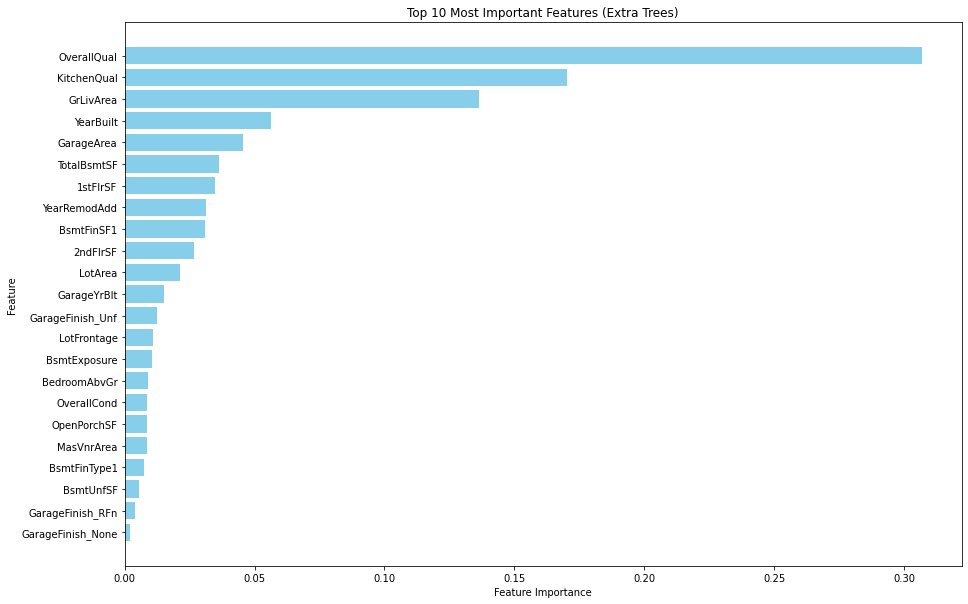

In [620]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

best_model_name = 'Extra Trees'
best_model_instance = models[best_model_name]

feature_importances = best_model_instance.feature_importances_

feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(15, 10))
plt.barh(feature_importance_df['Feature'][:][::-1], feature_importance_df['Importance'][:][::-1], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Top 10 Most Important Features (Extra Trees)')
plt.show()

In [621]:
feature_importance_df

,Feature,Importance
16,OverallQual,0.306718
10,KitchenQual,0.170243
9,GrLivArea,0.136291
18,YearBuilt,0.056199
7,GarageArea,0.045421
17,TotalBsmtSF,0.036162
0,1stFlrSF,0.034818
19,YearRemodAdd,0.031244
4,BsmtFinSF1,0.031083
1,2ndFlrSF,0.026885


- <b> The feature importance chart of the best regressor (Extra Tree) shows the importance of each individual feature in the model. OverallQual, KitchenQual, GrLivArea, YearBuilt and GarageArea are the top 5 most important features whereas MasVnrArea, BsmtFinType1, BsmtUnfSF, GarageFinish_RFn and GarageFinish_None are the features adding least amount of importance to our model.
</b>

In [622]:
# Save the trained model to a file
with open('saved_model/model.pkl', 'wb') as file:
    pickle.dump(best_model_instance, file)

print("Model saved to model.pkl")

Model saved to model.pkl


- <b> We are saving our best model into a pickle file so that we can use and deploy it for future predictions of new houses for the Saleprice.
</b>

In [623]:
results_df

,Model,RMSE,MAE,MAPE,Median AE,R2,Adjusted R2
3,Extra Trees,25242.620511,16188.452000,10.081139,10035.500000,0.909042,0.902907
4,Gradient Boosting,27190.810064,17027.439911,9.956005,11005.915568,0.894460,0.887341
0,Random Forest,28044.140794,17548.286676,10.427761,10063.500000,0.887732,0.880159
1,XGBoost,28426.546466,17106.000000,9.980648,9535.906250,0.884649,0.876869
2,AdaBoost,34061.039897,23757.016358,15.831555,16801.891697,0.834389,0.823219


### **Conclusion**

Based on the evaluation of multiple machine learning models for predicting house sale prices in Ames, Iowa, the **Extra Trees Regressor** emerged as the best-performing model. It demonstrated superior predictive accuracy and robustness across all key metrics, making it the most suitable choice for this task. Below is a summary of the findings:

1. **Extra Trees Regressor**:
   - Achieved the lowest **Root Mean Squared Error (RMSE)** of **25,242.62**, indicating that its predictions are closest to the actual sale prices on average.
   - Recorded the lowest **Mean Absolute Error (MAE)** of **16,188.45**, further confirming its ability to minimize prediction errors.
   - Delivered a **Mean Absolute Percentage Error (MAPE)** of **10.08%**, showing that its predictions are, on average, within 10.08% of the actual sale prices.
   - Achieved the highest **R²** value of **0.91**, meaning it explains 91% of the variance in house sale prices, and an **Adjusted R²** of **0.90**, confirming its generalizability to unseen data.

2. **Gradient Boosting Regressor**:
   - Performed well with an **RMSE** of **27,190.81** and an **R²** of **0.89**, but it fell short of the Extra Trees Regressor in terms of overall accuracy and error minimization.

3. **Random Forest Regressor**:
   - Delivered competitive results with an **RMSE** of **28,044.14** and an **R²** of **0.88**, but its higher error metrics make it less reliable compared to Extra Trees.

4. **XGBoost Regressor**:
   - Achieved a slightly lower **MAPE** of **9.98%**, but its higher **RMSE** of **28,426.55** and lower **R²** of **0.88** indicate that it is less accurate overall.

5. **AdaBoost Regressor**:
   - Performed the worst among all models, with the highest **RMSE** of **34,061.04** and the lowest **R²** of **0.83**, making it unsuitable for this task.

### **Recommendation**
The **Extra Trees Regressor** is the most robust and accurate model for predicting house sale prices in Ames, Iowa. Its ability to minimize errors and explain the variance in sale prices makes it the ideal choice for deployment in the web application. This model will provide Lydia Doe with reliable price predictions for her inherited properties and serve as a valuable decision-making tool for future property evaluations.

By leveraging the Extra Trees Regressor, Lydia can confidently assess the value of her properties and make informed decisions to maximize potential sales revenue.

----

## Predicting the House Price for Four Inherited Houses of Lydia.

In [624]:
inherited_house_df = pd.read_csv('data/inherited_houses.csv')

In [625]:
del inherited_house_df['EnclosedPorch']
del inherited_house_df['WoodDeckSF']

In [626]:
inherited_house_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageFinish,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd
0,896,0,2,No,468.0,Rec,270.0,730.0,Unf,1961.0,896,TA,11622,80.0,0.0,0,6,5,882.0,1961,1961
1,1329,0,3,No,923.0,ALQ,406.0,312.0,Unf,1958.0,1329,Gd,14267,81.0,108.0,36,6,6,1329.0,1958,1958
2,928,701,3,No,791.0,GLQ,137.0,482.0,Fin,1997.0,1629,TA,13830,74.0,0.0,34,5,5,928.0,1997,1998
3,926,678,3,No,602.0,GLQ,324.0,470.0,Fin,1998.0,1604,Gd,9978,78.0,20.0,36,6,6,926.0,1998,1998


In [627]:
# Ordinal Encoding for inherited_house_df
bsmt_exposure_mapping = {'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'None': 0}
bsmt_fin_type1_mapping = {'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec': 3, 'LwQ': 2, 'Unf': 1, 'None': 0}
kitchen_qual_mapping = {'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1}

inherited_house_df['BsmtExposure'] = inherited_house_df['BsmtExposure'].map(bsmt_exposure_mapping)
inherited_house_df['BsmtFinType1'] = inherited_house_df['BsmtFinType1'].map(bsmt_fin_type1_mapping)
inherited_house_df['KitchenQual'] = inherited_house_df['KitchenQual'].map(kitchen_qual_mapping)

# One-Hot Encoding for GarageFinish
garage_finish_dummies = pd.get_dummies(inherited_house_df['GarageFinish'], prefix='GarageFinish')

# garage_finish_dummies
inherited_house_df = pd.concat([inherited_house_df, garage_finish_dummies], axis=1)
inherited_house_df.drop('GarageFinish', axis=1, inplace=True)

# Ensure all one-hot encoded columns match the training data
for col in ['GarageFinish_RFn', 'GarageFinish_Unf', 'GarageFinish_None']:
    if col not in inherited_house_df.columns:
        inherited_house_df[col] = False  # Add missing columns with default value 0

In [628]:
inherited_house_df.head()

,1stFlrSF,2ndFlrSF,BedroomAbvGr,BsmtExposure,BsmtFinSF1,BsmtFinType1,BsmtUnfSF,GarageArea,GarageYrBlt,GrLivArea,KitchenQual,LotArea,LotFrontage,MasVnrArea,OpenPorchSF,OverallCond,OverallQual,TotalBsmtSF,YearBuilt,YearRemodAdd,GarageFinish_Fin,GarageFinish_Unf,GarageFinish_RFn,GarageFinish_None
0,896,0,2,1,468.0,3,270.0,730.0,1961.0,896,3,11622,80.0,0.0,0,6,5,882.0,1961,1961,False,True,False,False
1,1329,0,3,1,923.0,5,406.0,312.0,1958.0,1329,4,14267,81.0,108.0,36,6,6,1329.0,1958,1958,False,True,False,False
2,928,701,3,1,791.0,6,137.0,482.0,1997.0,1629,3,13830,74.0,0.0,34,5,5,928.0,1997,1998,True,False,False,False
3,926,678,3,1,602.0,6,324.0,470.0,1998.0,1604,4,9978,78.0,20.0,36,6,6,926.0,1998,1998,True,False,False,False


In [629]:
X_inherited = inherited_house_df[X.columns]
inherited_house_df['Predicted_SalePrice'] = best_model_instance.predict(X_inherited)

In [630]:
# Display the predictions
print("\nPredicted SalePrice for Inherited Houses:")
inherited_house_df[['Predicted_SalePrice']]
# print(inherited_house_df[['House_No', 'Predicted_SalePrice']].to_string(index=False))


Predicted SalePrice for Inherited Houses:


,Predicted_SalePrice
0,121671.82
1,160107.00
2,166636.50
3,190618.00


In [631]:
inherited_house_df.to_csv('model_evaluation_results/results_inherited_houses_predictions.csv', index=False)

<b>The Predicted Sale price of four houses of Lydia are:
1. 121671.82
2. 160107.00
3. 166636.50
4. 190618.00 </b>

### End of the Notebook